In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import pandas as pd
import math

# Load dữ liệu

In [2]:
df = pd.read_csv('../2.Feature Engineering/new data/modelling_set.csv')
df.describe()

,MemberID,LabCount_total,LabCount_max,LabCount_min,LabCount_ave,LabCount_months,LabCount_std,DrugCount_total,DrugCount_max,DrugCount_min,...,ProcedureGroup_Count_SO,ProcedureGroup_Count_SMCD,AgeAtFirstClaim,Male,Female,MissSex,MissAge,ClaimsTruncated,TARGET,trainset
count,2.184150e+05,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,...,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.000000,218415.0,218415.000000,147473.000000,218415.000000
mean,4.993458e+07,6.471827,3.829439,2.181860,2.918800,1.655033,0.578166,10.387318,2.193531,0.962237,...,0.001699,0.015457,47.750155,0.363524,0.448078,0.188398,0.0,0.054863,0.452951,0.675196
std,2.892479e+07,7.734678,3.440373,2.507408,2.676663,1.906704,1.683426,15.721582,2.271990,1.057978,...,0.047286,0.262061,23.238375,0.481015,0.497298,0.391031,0.0,0.227714,1.573818,0.468303
min,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.478774e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,4.993677e+07,4.000000,4.000000,1.000000,2.666667,1.000000,0.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,7.515525e+07,10.000000,7.000000,3.000000,5.000000,2.000000,1.527525,14.000000,4.000000,1.000000,...,0.000000,0.000000,65.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,9.999882e+07,111.000000,10.000000,10.000000,10.000000,12.000000,6.363961,84.000000,7.000000,7.000000,...,4.000000,23.000000,80.000000,1.000000,1.000000,1.000000,0.0,1.000000,15.000000,1.000000


In [3]:
df_train = df[df['trainset']==1]
df_target = df[df['trainset']==0]


In [4]:
#Count missing data
def count_missing(df):   
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))
    return missing_data

count_missing(df_train)

                                         Total  Percent
trainset                                     0      0.0
PlaceSvc_Count_Unknown                       0      0.0
Specialty_Count_Surgery                      0      0.0
CharlsonIndex_range                          0      0.0
DSFS_range                                   0      0.0
no_PrimaryConditionGroup_PlaceSvc            0      0.0
no_ProcedureGroup_PrimaryConditionGroup      0      0.0
no_ProcedureGroup_Specialty                  0      0.0
no_PrimaryConditionGroup_Specialty           0      0.0
CharlsonIndex_std                            0      0.0
CharlsonIndex_ave                            0      0.0
CharlsonIndex_min                            0      0.0
CharlsonIndex_max                            0      0.0
CharlsonIndex_sum                            0      0.0
DSFS_std                                     0      0.0
DSFS_ave                                     0      0.0
DSFS_min                                     0  

,Total,Percent
trainset,0,0.0
PlaceSvc_Count_Unknown,0,0.0
Specialty_Count_Surgery,0,0.0
CharlsonIndex_range,0,0.0
DSFS_range,0,0.0
...,...,...
PrimaryConditionGroup_Count_CANCRB,0,0.0
PrimaryConditionGroup_Count_SKNAUT,0,0.0
PrimaryConditionGroup_Count_HIPFX,0,0.0
PrimaryConditionGroup_Count_GIBLEED,0,0.0


In [5]:
m = (df_train.columns != 'TARGET') & (df_train.columns != 'MemberID') & (df_train.columns != 'Year') & (df_train.columns != 'trainset')
X = df_train.loc[:, m]
y = df_train['TARGET']
y.describe()

count    147473.000000
mean          0.452951
std           1.573818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: TARGET, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
#scaler = StandardScaler().fit(X)


new_X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=123)

In [7]:
def eval(model, X_test, y_test):
    pred_y = model.predict(X_test) # your predicted y values
    pred_y = pred_y.astype(int)
    # The root mean square logarithmic error
    msle = np.mean( (np.log(pred_y + 1) - np.log(y_test + 1)) ** 2)
    rmsle = math.sqrt(msle)
    from sklearn.metrics import r2_score
    r2 = r2_score(pred_y, y_test)
    return rmsle, r2

In [8]:
from sklearn import ensemble

model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1, warm_start=False)

In [9]:
model_linear = LinearRegression()

# FIT trên dữ liệu nguyên gốc ban đầu với các models khác nhau
Với model Random Forest cho ta lựa chọn được feature quan trọng để selection

Với linear thì chọn ra số lượng feauture quan trọng nhất

In [10]:
model.fit(X_train, y_train)
eval(model, X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.3min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.4s finished


(0.4934641574374976, -20.83256821704701)

# Lựa chọn các feature cần biến đổi

In [11]:
a = model.feature_importances_
x = { i : a[i] for i in range(0, len(a) ) }

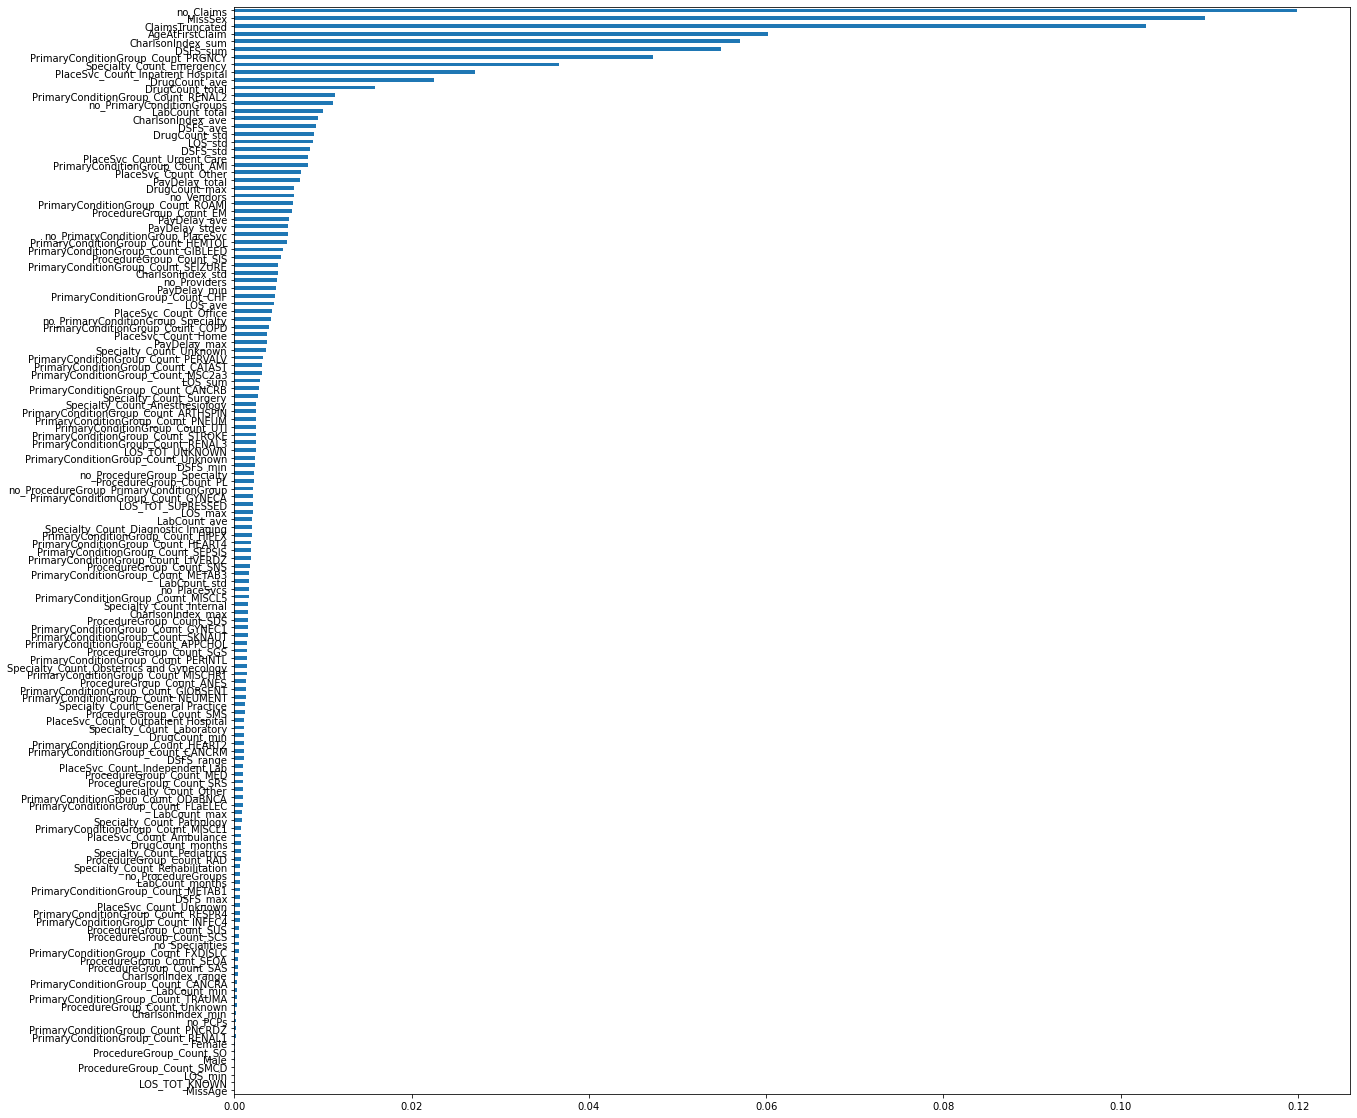

In [12]:
feature_scores_rdfr = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
feature_scores_rdfr.plot(kind='barh', figsize=(20, 20))

In [13]:
import operator
sorted_x = sorted(x.items(), key=operator.itemgetter(1))

In [14]:
print(sorted_x)

[(27, 0.0), (32, 0.0), (139, 0.0), (134, 3.4724541996818143e-06), (136, 4.4270884204302524e-05), (133, 5.135217231454561e-05), (137, 0.00010675269662019558), (114, 0.00015633940793668047), (113, 0.00016739456742725117), (15, 0.0001939870361508079), (40, 0.00019938838382313608), (129, 0.0002796793399301189), (74, 0.0003017786645808942), (2, 0.0003678842480139938), (108, 0.0003700766191863294), (48, 0.00041011548797607064), (130, 0.0004443981552164903), (127, 0.0004715655929218948), (73, 0.000493500983744147), (17, 0.0005204663582219955), (119, 0.0005349921518945563), (132, 0.0005906080957837105), (76, 0.0006071030054245617), (75, 0.0006108253317587177), (69, 0.000616875218629853), (34, 0.0006579306820793008), (97, 0.0006659654350615644), (4, 0.0006717902989763745), (19, 0.0007001710912557956), (53, 0.000705467501654714), (120, 0.0007291653945020631), (52, 0.0007466056024782113), (10, 0.000760378559111976), (67, 0.0007726291411269876), (103, 0.0007863986544421215), (60, 0.000831981704560

## Thử với 70 feature quan trọng đầu tiên xem sự thay đổi của perform, từ đó quyết định số lượng feature cần biến đổi

In [15]:
Df = pd.DataFrame()
rmsle_test = []
r2_test = []
for i in range(50):
    Df = pd.concat([Df, X.iloc[:, sorted_x[len(sorted_x)-i-1][0]]], axis = 1)
    scaler = MinMaxScaler(feature_range=(0,1)).fit(Df)
    new_X = scaler.transform(Df)
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=123)
    model_linear.fit(X_train, y_train)
    rmsle, r2 = eval(model_linear, X_test, y_test)
    rmsle_test.append(rmsle)
    r2_test.append(r2)

In [16]:
print(rmsle_test)
print(r2_test)

[0.5107524636190317, 0.5086873885122146, 0.5051967585326445, 0.503922164387438, 0.5040322886612236, 0.5045688838944963, 0.5045616047202186, 0.5009578309126531, 0.501180280620613, 0.5002504006395199, 0.5001485118600608, 0.49987374631851317, 0.4996985892520739, 0.4996872544828648, 0.49979590722434114, 0.49980666504382326, 0.5000035817089056, 0.500156184603276, 0.4997482278786754, 0.499996142187023, 0.5001436150178261, 0.5005180200304885, 0.5000405680334721, 0.49987007297804725, 0.5002549539238899, 0.5002960570439067, 0.4989916248057057, 0.4989326271746422, 0.4990182273941062, 0.4993441372923961, 0.49909764310161625, 0.4986074374498728, 0.49866144365769305, 0.49900684690705766, 0.4987746264756075, 0.4988429634478212, 0.4988030608624167, 0.49853093227222417, 0.49857863933733587, 0.4985509441281518, 0.4983543329913453, 0.49828310492317746, 0.4982235307410446, 0.49828736142302643, 0.4984062096353465, 0.49834057522429126, 0.4985178930090308, 0.4985149793623359, 0.4987605769459294, 0.498544376

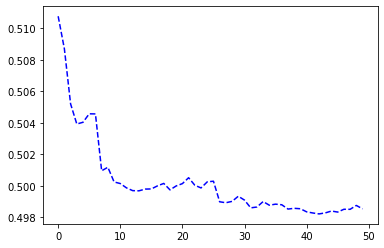

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rmsle_test, 'b--')


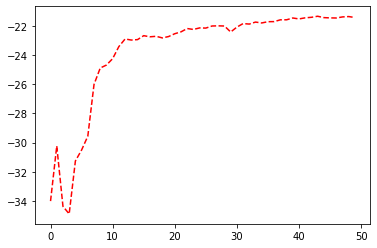

In [18]:
plt.plot(r2_test, 'r--')

In [19]:
print(r2_test[29])
print(rmsle_test[29])

-22.41826902336839
0.4993441372923961


## Ta thấy có 12 feature quan trọng đầu tiên mới ảnh hưởng đến performance nhất

In [20]:
new_data = pd.DataFrame()
for i in range(0,12):
    new_data = pd.concat([new_data, X.iloc[:, sorted_x[len(sorted_x)-i-1][0]]], axis = 1)
new_data.head()

,no_Claims,MissSex,ClaimsTruncated,AgeAtFirstClaim,CharlsonIndex_sum,DSFS_sum,PrimaryConditionGroup_Count_PRGNCY,Specialty_Count_Emergency,PlaceSvc_Count_Inpatient Hospital,DrugCount_ave,DrugCount_total,PrimaryConditionGroup_Count_RENAL2
0,8,1,0,35,0,28,1,2,0,1.666667,5.0,0
1,6,1,0,35,0,27,5,0,0,0.000000,0.0,0
3,13,0,0,45,8,14,0,4,0,3.000000,30.0,0
4,6,0,0,15,0,26,0,0,0,0.000000,0.0,0
5,11,0,0,15,0,16,0,3,0,0.000000,0.0,0


## Biến đổi 12 feature đầu tiên

In [33]:
importance_features = list()
for i in range(0,12):
    importance_features.append(X.columns[sorted_x[len(sorted_x)-i-1][0]])  

In [34]:
importance_features

['no_Claims',
 'MissSex',
 'ClaimsTruncated',
 'AgeAtFirstClaim',
 'CharlsonIndex_sum',
 'DSFS_sum',
 'PrimaryConditionGroup_Count_PRGNCY',
 'Specialty_Count_Emergency',
 'PlaceSvc_Count_Inpatient Hospital',
 'DrugCount_ave',
 'DrugCount_total',
 'PrimaryConditionGroup_Count_RENAL2']

In [50]:
df[importance_features]

,no_Claims,MissSex,ClaimsTruncated,AgeAtFirstClaim,CharlsonIndex_sum,DSFS_sum,PrimaryConditionGroup_Count_PRGNCY,Specialty_Count_Emergency,PlaceSvc_Count_Inpatient Hospital,DrugCount_ave,DrugCount_total,PrimaryConditionGroup_Count_RENAL2
0,8,1,0,35,0,28,1,2,0,1.666667,5.0,0
1,6,1,0,35,0,27,5,0,0,0.000000,0.0,0
2,4,1,0,35,0,15,3,0,0,1.250000,5.0,0
3,13,0,0,45,8,14,0,4,0,3.000000,30.0,0
4,6,0,0,15,0,26,0,0,0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
218410,3,0,0,15,0,5,0,0,0,0.000000,0.0,0
218411,4,0,0,5,0,4,0,2,0,0.000000,0.0,0
218412,3,0,0,25,0,3,0,2,0,0.000000,0.0,0
218413,12,0,0,35,0,14,0,0,0,0.000000,0.0,0


In [55]:
new_data = pd.DataFrame()
new_data = df[importance_features].copy()

In [56]:
new_data.head()

,no_Claims,MissSex,ClaimsTruncated,AgeAtFirstClaim,CharlsonIndex_sum,DSFS_sum,PrimaryConditionGroup_Count_PRGNCY,Specialty_Count_Emergency,PlaceSvc_Count_Inpatient Hospital,DrugCount_ave,DrugCount_total,PrimaryConditionGroup_Count_RENAL2
0,8,1,0,35,0,28,1,2,0,1.666667,5.0,0
1,6,1,0,35,0,27,5,0,0,0.000000,0.0,0
2,4,1,0,35,0,15,3,0,0,1.250000,5.0,0
3,13,0,0,45,8,14,0,4,0,3.000000,30.0,0
4,6,0,0,15,0,26,0,0,0,0.000000,0.0,0


In [60]:
for i in range(0,12):
    for j in range(i,12):
        print(new_data.columns[i]+ '_' + str(new_data.columns[j]))
        

no_Claims_no_Claims
no_Claims_MissSex
no_Claims_ClaimsTruncated
no_Claims_AgeAtFirstClaim
no_Claims_CharlsonIndex_sum
no_Claims_DSFS_sum
no_Claims_PrimaryConditionGroup_Count_PRGNCY
no_Claims_Specialty_Count_Emergency
no_Claims_PlaceSvc_Count_Inpatient Hospital
no_Claims_DrugCount_ave
no_Claims_DrugCount_total
no_Claims_PrimaryConditionGroup_Count_RENAL2
MissSex_MissSex
MissSex_ClaimsTruncated
MissSex_AgeAtFirstClaim
MissSex_CharlsonIndex_sum
MissSex_DSFS_sum
MissSex_PrimaryConditionGroup_Count_PRGNCY
MissSex_Specialty_Count_Emergency
MissSex_PlaceSvc_Count_Inpatient Hospital
MissSex_DrugCount_ave
MissSex_DrugCount_total
MissSex_PrimaryConditionGroup_Count_RENAL2
ClaimsTruncated_ClaimsTruncated
ClaimsTruncated_AgeAtFirstClaim
ClaimsTruncated_CharlsonIndex_sum
ClaimsTruncated_DSFS_sum
ClaimsTruncated_PrimaryConditionGroup_Count_PRGNCY
ClaimsTruncated_Specialty_Count_Emergency
ClaimsTruncated_PlaceSvc_Count_Inpatient Hospital
ClaimsTruncated_DrugCount_ave
ClaimsTruncated_DrugCount_total


In [63]:
new_data[importance_features[2]]

0         0
1         0
2         0
3         0
4         0
         ..
218410    0
218411    0
218412    0
218413    0
218414    0
Name: ClaimsTruncated, Length: 218415, dtype: int64

In [64]:
for i in range(0,12):
    for j in range(i,12):
        new_data[str(new_data.columns[i]) + '_' + str(new_data.columns[j])] = new_data[importance_features[i]] * new_data[importance_features[j]]
new_data.head()

,no_Claims,MissSex,ClaimsTruncated,AgeAtFirstClaim,CharlsonIndex_sum,DSFS_sum,PrimaryConditionGroup_Count_PRGNCY,Specialty_Count_Emergency,PlaceSvc_Count_Inpatient Hospital,DrugCount_ave,...,PlaceSvc_Count_Inpatient Hospital_PlaceSvc_Count_Inpatient Hospital,PlaceSvc_Count_Inpatient Hospital_DrugCount_ave,PlaceSvc_Count_Inpatient Hospital_DrugCount_total,PlaceSvc_Count_Inpatient Hospital_PrimaryConditionGroup_Count_RENAL2,DrugCount_ave_DrugCount_ave,DrugCount_ave_DrugCount_total,DrugCount_ave_PrimaryConditionGroup_Count_RENAL2,DrugCount_total_DrugCount_total,DrugCount_total_PrimaryConditionGroup_Count_RENAL2,PrimaryConditionGroup_Count_RENAL2_PrimaryConditionGroup_Count_RENAL2
0,8,1,0,35,0,28,1,2,0,1.666667,...,0,0.0,0.0,0,2.777778,8.333333,0.0,25.0,0.0,0
1,6,1,0,35,0,27,5,0,0,0.000000,...,0,0.0,0.0,0,0.000000,0.000000,0.0,0.0,0.0,0
2,4,1,0,35,0,15,3,0,0,1.250000,...,0,0.0,0.0,0,1.562500,6.250000,0.0,25.0,0.0,0
3,13,0,0,45,8,14,0,4,0,3.000000,...,0,0.0,0.0,0,9.000000,90.000000,0.0,900.0,0.0,0
4,6,0,0,15,0,26,0,0,0,0.000000,...,0,0.0,0.0,0,0.000000,0.000000,0.0,0.0,0.0,0


In [66]:
new_data.shape

(218415, 90)

In [ ]:
new_data.drop(new_data.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11]], axis=1, inplace=True)

In [67]:
df_new = pd.concat([df, new_data], axis = 1)

In [68]:
df_new.to_csv('../2.Feature Engineering/new data/modelling_set_newfeature.csv',index=False)

# Test thử trên data mới sau khi biến đổi feature

In [69]:
df_train = df_new[df_new['trainset']==1]
df_target = df_new[df_new['trainset']==0]

In [70]:
m = (df_train.columns != 'TARGET') & (df_train.columns != 'MemberID') & (df_train.columns != 'Year') & (df_train.columns != 'trainset')
X = df_train.loc[:, m]
y = df_train['TARGET']
y.describe()

count    147473.000000
mean          0.452951
std           1.573818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: TARGET, dtype: float64

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
#scaler = StandardScaler().fit(X)

new_X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=123)

In [73]:
model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=500,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1, warm_start=False)

In [74]:
model.fit(X_train, y_train)
rmsle_train, r2_train = eval(model, X_train, y_train)
rmsle_test, r2_test = eval(model, X_test, y_test)
print(rmsle_train, r2_train)
print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

0.47433270544618783 -17.074495201750654
0.49612154091404176 -19.653960480463642


[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.5s finished


# Chạy với max feuture

In [75]:
max_features = [12, 14,16,18,20, 27, 28, 29]
for max_feature in max_features:
    model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                max_features=max_feature, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=5, min_samples_split=500,
                min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
                oob_score=False, random_state=None, verbose=1, warm_start=False)
    model.fit(X_train, y_train)
    rmsle_train, r2_train = eval(model, X_train, y_train)
    rmsle_test, r2_test = eval(model, X_test, y_test)
    print('max_feature: ' + str(max_feature))
    print(rmsle_train, r2_train)
    print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   37.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

max_feature: 12
0.47686166852085893 -19.42583398314811
0.4946407010554566 -21.904189875105885


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   42.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

max_feature: 14
0.4763510022554095 -19.164840257239153
0.4944984200639377 -21.50574259414654


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   48.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

max_feature: 16
0.4763036892328889 -18.85172422632781
0.4943421367636227 -21.398641393231262


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   54.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

max_feature: 18
0.47614729555411983 -18.733889531488963
0.49484391275972667 -21.218822968996147


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

max_feature: 20
0.47605642806074977 -18.525892206935684
0.49403253015233456 -20.982808741409862


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

max_feature: 27
0.47557986227790966 -18.156509511127013
0.4939803155699845 -20.899037116609563


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

max_feature: 28
0.47573686708600377 -18.181667416335035
0.4937092395918872 -20.812471025715887


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

max_feature: 29
0.47526309699570074 -18.068151098793027
0.4934384158396036 -20.63520389512241


n_estimators len 2000

In [76]:
max_features = [12, 14,16,18,20, 27, 28, 29]
for max_feature in max_features:
    model= ensemble.RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                max_features=max_feature, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=5, min_samples_split=500,
                min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
                oob_score=False, random_state=None, verbose=1, warm_start=False)
    model.fit(X_train, y_train)
    rmsle_train, r2_train = eval(model, X_train, y_train)
    rmsle_test, r2_test = eval(model, X_test, y_test)
    print('max_feature: ' + str(max_feature))
    print(rmsle_train, r2_train)
    print(rmsle_test, r2_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.3min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    3.5s
[Parallel(n_job

max_feature: 12
0.47687381296920517 -19.492685501540347
0.4946262208910128 -22.000741460923276


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    2.7s
[Parallel(n_job

max_feature: 14
0.4763287069364971 -19.11146127196481
0.4944043011214889 -21.622129973848505


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.7min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    2.9s
[Parallel(n_job

max_feature: 16
0.47608656587693216 -18.878569054620666
0.4942104801997467 -21.313722422569814


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.9min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    2.9s
[Parallel(n_job

max_feature: 18
0.4759235823678149 -18.700457695828657
0.4943197832306718 -21.195739591813787


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    3.2s
[Parallel(n_job

max_feature: 20
0.47591176069099006 -18.4443334987473
0.49409496844138207 -21.055655090745912


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.7min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    3.0s
[Parallel(n_job

max_feature: 27
0.4754115769241422 -18.20841380951742
0.4939799308020903 -20.708773625542385


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.8min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    2.5s
[Parallel(n_job

max_feature: 28
0.4753649177791714 -18.107924373273597
0.4935660111337339 -20.681923565707315


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.9min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    2.5s
[Parallel(n_job

max_feature: 29
0.4752964830595131 -18.076847902107126
0.4936232244126179 -20.649887081213688
